In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
file_path = r"C:\Users\Nathan\Documents\WGU\D603\Task 2\churn_clean.csv"
df = pd.read_csv(file_path)

In [3]:
df.columns = df.columns.str.strip()

In [4]:
df = df.drop(['CaseOrder', 'Customer_id', 'UID', 'Interaction', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Email', 'TimeZone', 'Area'], axis=1)

In [5]:
imputer = SimpleImputer(strategy="mean")
df_imputed = pd.DataFrame(imputer.fit_transform(df.select_dtypes(include=[float, int])),
                          columns=df.select_dtypes(include=[float, int]).columns)

df_encoded = pd.get_dummies(df.select_dtypes(include=[object]), drop_first=True)

df_final = pd.concat([df_imputed, df_encoded], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_final)

In [6]:
df_final.to_csv("cleaned_churn_data.csv", index=False)

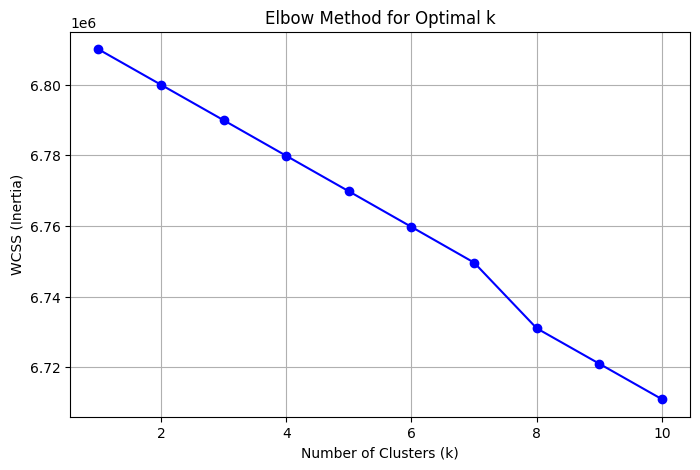

In [7]:
wcss = []
K = range(1, 11) 

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_) 

plt.figure(figsize=(8, 5))
plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

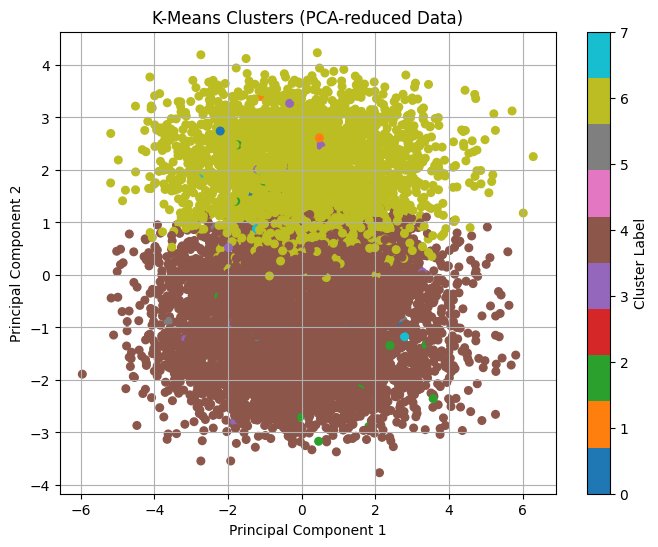

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=8, random_state=42)
labels = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=30)
plt.title('K-Means Clusters (PCA-reduced Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.colorbar(label='Cluster Label')
plt.show()